<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S3E25__Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S3E25 Mohs_Hardness - KAGGLE Competition**

Hardness, or the quantitative value of resistance to permanent or plastic deformation, plays a very crucial role in materials design in many applications, such as ceramic coatings and abrasives. Hardness testing is an especially useful method as it is non-destructive and simple to implement to gauge the plastic properties of a material. In this study, I proposed a machine, or statistical, learning approach to predict hardness in naturally occurring materials, which integrates atomic and electronic features from composition directly across a wide variety of mineral compositions and crystal systems. First, atomic and electronic features from the composition, such as van der Waals and covalent radii as well as the number of valence electrons, were extracted from the composition.

In this study, the author trained a set of classifiers to understand whether compositional features can be used to predict the Mohs hardness of minerals of different chemical spaces, crystal structures, and crystal classes. The dataset for training and testing the classification models used in this study originated from experimental Mohs hardness data, their crystal classes, and chemical compositions of naturally occurring minerals reported in the Physical and Optical Properties of Minerals CRC Handbook of Chemistry and Physics and the American Mineralogist Crystal Structure Database. The database is composed of 369 uniquely named minerals. Due to the presence of multiple composition combinations for minerals referred to by the same name, the first step was to perform compositional permutations on these minerals. This produced a database of 622 minerals of unique compositions, comprising 210 monoclinic, 96 rhombohedral, 89 hexagonal, 80 tetragonal, 73 cubic, 50 orthorhombic, 22 triclinic, 1 trigonal, and 1 amorphous structure. An independent dataset was compiled to validate the model performance. The validation dataset contains the composition, crystal structure, and Mohs hardness values of 51 synthetic single crystals reported in the literature. The validation dataset includes 15 monoclinic, 7 tetragonal, 7 hexagonal, 6 orthorhombic, 4 cubic, and 3 rhombohedral crystal structures.

In this study, the author constructed a database of compositional feature descriptors that characterize naturally occurring materials obtained directly from the Physical and Optical Properties of Minerals CRC Handbook45. This comprehensive compositional-based dataset allows us to train models that are able to predict hardness across a wide variety of mineral compositions and crystal classes. Each material in both the naturally occurring mineral and artificial single crystal datasets was represented by 11 atomic descriptors. The elemental features are the number of electrons, number of valence electrons, atomic number, Pauling electronegativity of the most common oxidation state, covalent atomic radii, van der Waals radii, and ionization energy of neutral.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Mineral_Dataset_Supplementary_Info.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     ShuffleSplit,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             median_absolute_error,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 8.987380504608154 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.0
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.2


### **1.1 Utility Functions**

#### Graph Functions:

In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ


def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(15, 5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette='viridis', ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)

    plt.tight_layout()
    plt.show()

def scatter_corr_plot(data_set=None, variables=None, target=None):
    if data_set is None or variables is None or target is None:
        raise ValueError("Please provide data_set and variables.")

    target = 'Hardness'

    full_features = data_set.columns.tolist()
    num_var = [column for column in data_set.columns if data_set[column].nunique() > 10]
    cat_var = [column for column in data_set.columns if data_set[column].nunique() < 10]


    num_rows = len(num_var)
    num_cols = 3

    total_plots = num_rows*num_cols
    plt.figure(figsize=(14,num_rows*2.5))

    for idx, col in enumerate(num_var):
        plt.subplot(num_rows, num_cols, idx % total_plots + 1)
        sns.scatterplot(x=col, y=target, data=data_set, color='#82B0D2',s=10)

        sns.regplot(x=col, y=target, data=data_set, scatter=False, color='#FA7F6F')

        corr_coef = data_set[target].corr(data_set[col])
        plt.text(0.95, 0.95, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
        mean_value = data_set[col].mean()

        plt.axvline(x=mean_value, color='black', linestyle='--', linewidth=1, label='Mean Value')
        plt.title(f"{col} : {target}")

    plt.tight_layout()
    plt.show()

def correlation_plot(data_train=None, data_test=None, variables=None):
    if data_train is None or data_test is None or variables is None:
        raise ValueError("Please provide data_train, data_test and variables.")
    corr_matrix_train = data_train[variables].corr()
    corr_matrix_test = data_test[variables].corr()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), gridspec_kw={'width_ratios': [0.80, 1.0]})
    sns.heatmap(corr_matrix_train, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[0], cbar = False)
    axes[0].set_title('Train Set', fontsize=15)

    sns.heatmap(corr_matrix_test, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[1], yticklabels=False, cbar = True, cbar_kws={"shrink": .50})
    axes[1].set_title('Test Set', fontsize=15)

    plt.suptitle('Correlation Matrices of Train and Test Sets', fontsize=25, weight = 'bold',y=0.9)
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.show()

def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(10, 3.5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette=palette_1, ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}', fontsize=10)
        ax.set_xlabel(x_var, fontsize=7)
        ax.set_ylabel(y_var, fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('MedAE')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

#### Data Analysis Functions

In [5]:
def adversarial_validation(data_train, data_test, target='Hardness',is_train_test="True"):

    adv_train = data_train.drop(target, axis = 1)
    adv_test = data_test.copy()
    if is_train_test==False:
      adv_test = adv_test.drop(target, axis = 1)

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    adv = pd.concat([adv_train, adv_test], ignore_index = True)
    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled['is_test']

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (6, 6))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def search_high_corr_pairs(data_set = None, variables =None, threshold = 0.7):
    corr_matrix=data_set[variables].corr()
    high_corr_pairs=[]

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1,len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(f'\033[91m{corr_matrix.columns[i]}\033[0m and \033[91m{corr_matrix.columns[j]}\033[0m are highly linearly correlated, indicating the possibility of collinearity.')
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))
    return high_corr_pairs


def transform_features(train,test):
  train_ = train.copy()
  test_ = test.copy()

  feat_log_transf = ["allelectrons_Total","density_Total","allelectrons_Average","atomicweight_Average",
                     "ionenergy_Average","zaratio_Average","density_Average"]

  feat_power_transf = ["val_e_Average","R_vdw_element_Average","el_neg_chi_Average"]

  log_transformer = FunctionTransformer(lambda x: np.log(x+1.0))
  power_transformer = FunctionTransformer(lambda x: np.power(x,2.0))

  for feat in feat_log_transf:
    train_[feat] = log_transformer.transform(train_[feat])
    test_[feat] = log_transformer.transform(test_[feat])

  for feat in feat_power_transf:
    train_[feat] = power_transformer.transform(train_[feat])
    test_[feat] = power_transformer.transform(test_[feat])

  return train_, test_


def replace_zeros(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_.replace({0:np.nan},inplace=True)
  test_.replace({0:np.nan},inplace=True)

  train_["nan_marker"] = train_.isna().any(axis=1).astype("int")
  test_["nan_marker"] = test_.isna().any(axis=1).astype("int")

  total = pd.concat([train_, test_], ignore_index=True)
  total.drop("Hardness",axis=1,inplace=True)

  total_col = list(total.columns)

  imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state = 0)
  imputer.fit(total[total_col])
  train_[total_col] = imputer.transform(train_[total_col])
  test_[total_col] = imputer.transform(test_[total_col])

  return train_, test_

def clip_values(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_["allelectrons_Total"] = train_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)
  test_["allelectrons_Total"] = test_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)

  train_["allelectrons_Average"] = train_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)
  test_["allelectrons_Average"] = test_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)

  train_["val_e_Average"] = train_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["val_e_Average"] = test_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["atomicweight_Average"] = train_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["atomicweight_Average"] = test_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["density_Total"] = train_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)
  test_["density_Total"] = test_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)

  train_["el_neg_chi_Average"] = train_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)
  test_["el_neg_chi_Average"] = test_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)

  train_["R_vdw_element_Average"] = train_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)
  test_["R_vdw_element_Average"] = test_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)

  train_["R_cov_element_Average"] = train_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)
  test_["R_cov_element_Average"] = test_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)

  train_["zaratio_Average"] = train_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)
  test_["zaratio_Average"] = test_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)

  train_["density_Average"] = train_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)
  test_["density_Average"] = test_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)

  train_["ionenergy_Average"] = train_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)
  test_["ionenergy_Average"] = test_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)


  return train_, test_

def prepare_dataset(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_,test_ = transform_features(train_,test_)
  train_,test_ = replace_zeros(train_,test_)
  train_,test_ = clip_values(train_,test_)

  return train_, test_

### **1.2 Connect Drives**

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Nov 24 12:34:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Connect to Google Drive:

In [7]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E25_Mohs_Hardness"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/neural_networks/"

list_directories = [folder_data,models_folders,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E25_Mohs_Hardness already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/neural_networks/ already exists


## 2.0 Upload Data

In [9]:
train = pd.read_csv("train_final.csv",index_col=0)
test = pd.read_csv("test_final.csv",index_col=0)

float_cols = train.select_dtypes("float").columns
int_cols = train.select_dtypes("int").columns

train[float_cols]=train[float_cols].astype("float32")
train[int_cols]=train[int_cols].astype("int32")

test[float_cols]=test[float_cols].astype("float32")
test[int_cols]=test[int_cols].astype("int32")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11006 entries, 0 to 11005
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   allelectrons_Total         11006 non-null  float32
 1   density_Total              11006 non-null  float32
 2   allelectrons_Average       11006 non-null  float32
 3   val_e_Average              11006 non-null  float32
 4   ionenergy_Average          11006 non-null  float32
 5   el_neg_chi_Average         11006 non-null  float32
 6   R_vdw_element_Average      11006 non-null  float32
 7   R_cov_element_Average      11006 non-null  float32
 8   zaratio_Average            11006 non-null  float32
 9   density_Average            11006 non-null  float32
 10  Hardness                   11006 non-null  float32
 11  nan_marker                 11006 non-null  int32  
 12  awa_cat                    11006 non-null  int32  
 13  grouped_atomicweight       11006 non-null  int

## 3.0 Data Loading

In [11]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Hardness")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [12]:
train_ds = dataframe_to_dataset(train,batch_size=1)
test_ds = dataframe_to_dataset(test,batch_size=1)

In [13]:
for x, y in dataframe_to_dataset(train, batch_size=1).take(1):
    print(f"Input: {x}")
    print(f"Target: {y}")

Input: {'allelectrons_Total': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.6151204], dtype=float32)>, 'density_Total': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6106407], dtype=float32)>, 'allelectrons_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.3978953], dtype=float32)>, 'val_e_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([23.04], dtype=float32)>, 'ionenergy_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.4922216], dtype=float32)>, 'el_neg_chi_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([7.650756], dtype=float32)>, 'R_vdw_element_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.999824], dtype=float32)>, 'R_cov_element_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.86], dtype=float32)>, 'zaratio_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.34724092], dtype=float32)>, 'density_Average': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.64949304

In [14]:
train_ds_with_no_labels = train_ds.map(lambda x, _: x)

def example_feature_space(dataset, feature_space, feature_names):
    feature_space.adapt(dataset)
    for x in dataset.take(1):
        inputs = {feature_name: x[feature_name] for feature_name in feature_names}
        preprocessed_x = feature_space(inputs)
        print(f"Input: {[{k:v.numpy()} for k, v in inputs.items()]}")
        print(f"Preprocessed output: {[{k:v.numpy()} for k, v in preprocessed_x.items()]}")

In [15]:
train.awa_cat.unique()

array([1, 3, 2, 4, 0, 5], dtype=int32)

In [16]:
feature_space = FeatureSpace(
    features={
        "awa_cat": FeatureSpace.integer_hashed(num_bins=6, output_mode="one_hot")
    },
    output_mode="dict",
)
example_feature_space(train_ds_with_no_labels, feature_space, ["awa_cat"])

Input: [{'awa_cat': array([1], dtype=int32)}]
Preprocessed output: [{'awa_cat': array([[0., 0., 0., 1., 0., 0.]], dtype=float32)}]


In [17]:
feature_space = FeatureSpace(
    features={
        "awa_cat": FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot"),
        "grouped_atomicweight": FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot")
    },
    crosses=[
        FeatureSpace.cross(feature_names=("awa_cat", "grouped_atomicweight"), crossing_dim=8)],
    output_mode="dict",
)
example_feature_space(train_ds_with_no_labels, feature_space, ["awa_cat","grouped_atomicweight"])

Input: [{'awa_cat': array([1], dtype=int32)}, {'grouped_atomicweight': array([0], dtype=int32)}]
Preprocessed output: [{'awa_cat': array([[0., 0., 0., 1., 0., 0.]], dtype=float32)}, {'grouped_atomicweight': array([[1., 0.]], dtype=float32)}, {'awa_cat_X_grouped_atomicweight': array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)}]


In [18]:
float_feat = list(float_cols)
int_feat = list(int_cols)
float_feat.remove("Hardness")

In [19]:
feature_space_dict = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in int_feat},**{a:FeatureSpace.float_normalized() for a in float_feat}},
                                  # Specify feature cross with a custom crossing dim.
                                  crosses=[FeatureSpace.cross(feature_names=("awa_cat","grouped_atomicweight"), crossing_dim=8, output_mode="one_hot")],
                                  output_mode="dict"
                                  )

feature_space_conc = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in int_feat},**{a:FeatureSpace.float_normalized() for a in float_feat}},
                                  # Specify feature cross with a custom crossing dim.
                                  crosses=[FeatureSpace.cross(feature_names=("awa_cat","grouped_atomicweight"), crossing_dim=8, output_mode="one_hot")],
                                  output_mode="concat"
                                  )

In [20]:
%%time
train_ds_with_no_labels = train_ds.map(lambda x, _: x)
feature_space_dict.adapt(train_ds_with_no_labels)
feature_space_conc.adapt(train_ds_with_no_labels)

CPU times: user 9min 23s, sys: 1min 12s, total: 10min 35s
Wall time: 7min 38s


In [21]:
for x, _ in train_ds.take(1):
    preprocessed_x = feature_space_conc(x)
    print("preprocessed_x.shape:", preprocessed_x.shape)
    print("preprocessed_x.dtype:", preprocessed_x.dtype)

preprocessed_x.shape: (1, 39)
preprocessed_x.dtype: <dtype: 'float32'>


In [22]:
preprocessed_train_ds_dict = train_ds.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds_dict = test_ds.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

preprocessed_train_ds_conc = train_ds.map(lambda x, y: (feature_space_conc(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds_conc = test_ds.map(lambda x, y: (feature_space_conc(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [23]:
for x, y in preprocessed_train_ds_dict.take(1):
    print("preprocessed_x.shape:", x.keys())
    print("y.dtype:", y.dtype)

preprocessed_x.shape: dict_keys(['R_cov_element_Average', 'R_vdw_element_Average', 'allelectrons_Average', 'allelectrons_Total', 'atomicweight_density_diff', 'awa_cat', 'combined_feature', 'density_Average', 'density_Total', 'density_per_valence', 'el_neg_chi_Average', 'grouped_atomicweight', 'ionenergy_Average', 'nan_marker', 'tree_feat_v3', 'tree_feat_v33', 'tree_feat_v56', 'tree_feat_v57', 'tree_feat_v58', 'tree_feat_v60', 'tree_feat_v84', 'tree_feat_v94', 'val_e_Average', 'zaratio_Average', 'awa_cat_X_grouped_atomicweight'])
y.dtype: <dtype: 'float32'>


In [24]:
for x, y in preprocessed_train_ds_conc.take(1):
    print("preprocessed_x.shape:", x.shape)
    print("y.dtype:", y.shape)

preprocessed_x.shape: (1, 39)
y.dtype: (1,)


In [25]:
encoded_features_dict = feature_space_dict.get_encoded_features()
print(encoded_features_dict)

{'R_cov_element_Average': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_8_preprocessor')>, 'R_vdw_element_Average': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_7_preprocessor')>, 'allelectrons_Average': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_3_preprocessor')>, 'allelectrons_Total': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_1_preprocessor')>, 'atomicweight_density_diff': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_13_preprocessor')>, 'awa_cat': <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'category_encoding_4')>, 'combined_feature': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_12_preprocessor')>, 'density_Average': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_10_preprocessor')>, 'density_Total': <KerasTensor: shape=(Non

## 4.0 MODELS
-----------------------

**MedianAbsoluteError - MedAE**

In [26]:
import tensorflow_probability as tfp
def med_abs_error(y_true, y_pred):
    abs_difference = tf.abs(y_true - y_pred)
    return tfp.stats.percentile(abs_difference, q=50)

### 4.1 Baseline:

In [37]:
def create_baseline_model(fs,data_format="conc", name="baseline_model",learning_rate = 0.001):

  encoded_features_conc = fs.get_encoded_features()

  x = tf.keras.layers.Dense(128, activation="relu", name="dense_0")(encoded_features_conc)
  x = tf.keras.layers.BatchNormalization(name="bn_0")(x)
  x = tf.keras.layers.Dropout(0.33,name="do_0")(x)

  x = tf.keras.layers.Dense(128, activation="relu", name="dense_1")(x)
  x = tf.keras.layers.BatchNormalization(name="bn_1")(x)
  x = tf.keras.layers.Dropout(0.33,name="do_1")(x)

  output = tf.keras.layers.Dense(1, activation="linear",name="output_final")(x)

  model = tf.keras.Model(inputs=encoded_features_conc, outputs=output, name=name)

  model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
          loss=med_abs_error,
          metrics=[keras.metrics.MeanAbsoluteError(name="MAE")],
          )

  return model

In [38]:
model = create_baseline_model(feature_space_conc)
model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 39)]              0         
                                                                 
 dense_0 (Dense)             (None, 128)               5120      
                                                                 
 bn_0 (BatchNormalization)   (None, 128)               512       
                                                                 
 do_0 (Dropout)              (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 bn_1 (BatchNormalization)   (None, 128)               512       
                                                                 
 do_1 (Dropout)              (None, 128)            

**Experiment Run Function**

In [39]:
def run_experiment(train,test_data_file,input_format="concat",experiment_name="model_baseline",splits=8, num_epochs=200, batch_size=32):

  skf = ShuffleSplit(n_splits=splits, random_state=78)
  test_results_df = pd.DataFrame(index=test_data_file.index, columns=list(range(splits)))
  all_maed = []


  for i, (train_index, valid_index) in enumerate(skf.split(train)):

    print(f"\nRunning CV {i}\n")
    # Prepare the Dataset:
    train_data_file = train.loc[train_index,:]
    val_data_file = train.loc[valid_index,:]


    train_dataset = dataframe_to_dataset(train_data_file, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(val_data_file, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(test_data_file, batch_size=batch_size, shuffle=False)

    feature_space = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in int_feat},**{a:FeatureSpace.float_normalized() for a in float_feat}},
                                  # Specify feature cross with a custom crossing dim.
                                  crosses=[FeatureSpace.cross(feature_names=("awa_cat","grouped_atomicweight"), crossing_dim=8, output_mode="one_hot")],
                                  output_mode=input_format
                                 )

    train_ds_with_no_labels = train_dataset.map(lambda x, _: x)
    print("Adapting Features Space....")
    feature_space.adapt(train_ds_with_no_labels)

    preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    # Callbacks:
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
    reduce_on_plat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
    checkpoint_filepath = folders_nn + 'checkpoint/'
    Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_loss",
                                                    mode='min',
                                                    restore_best_weights=True)

    # Generate Model
    model = create_baseline_model(feature_space)

    print("Start training the model...")
    history = model.fit(preprocessed_train_ds, epochs=num_epochs, callbacks=[early_stopping,Checkpoint,reduce_on_plat],validation_data=preprocessed_valid_ds)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    MedAE, MAE = model.evaluate(preprocessed_valid_ds, verbose=0)

    plot_training_session(history)

    y_hat = model.predict(preprocessed_test_ds)

    test_results_df.loc[:,i] = y_hat

    model.save(folders_nn+f'{experiment_name}/CV_{i}')
    feature_space.save(f"{folders_nn+experiment_name}/CV_{i}/myfeaturespace_{experiment_name}.keras")


    print(f"Test MedAE: {round(MedAE, 2)}%")
    all_maed.append(round(MedAE, 3))

  return test_results_df


Running CV 0

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 2.7032 - MAE: 4.0118 - val_loss: 1.3936 - val_MAE: 3.7056 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.6629 - MAE: 3.5998 - val_loss: 1.2489 - val_MAE: 3.5010 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.4779 - MAE: 3.3543 - val_loss: 1.0810 - val_MAE: 3.3315 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.3713 - MAE: 2.9628 - val_loss: 1.0112 - val_MAE: 2.9886 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2800 - MAE: 2.7313 - val_loss: 0.9252 - val_MAE: 2.4149 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2298 - MAE: 2.5385 - val_loss: 1.0809 - val_MAE: 2.2673 - lr: 0.0010
Epoch 7/200
310/310 [==============================] 

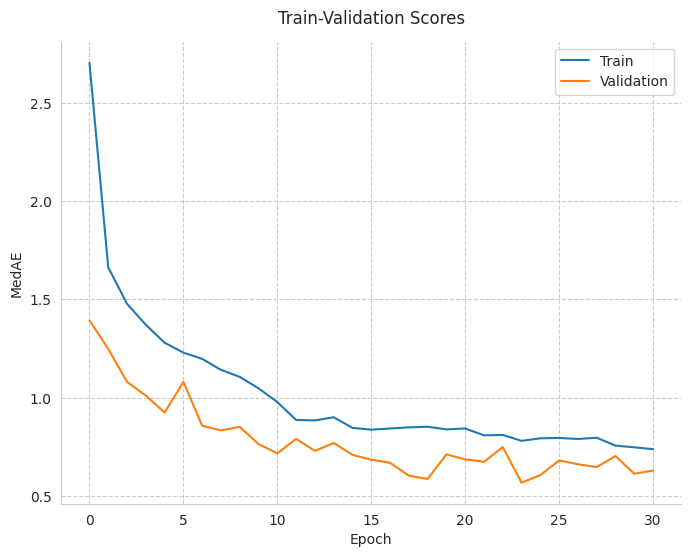

217/217 [==============================] - 1s 1ms/step
Test MedAE: 0.57%

Running CV 1

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 2.6239 - MAE: 3.9467 - val_loss: 1.3823 - val_MAE: 3.5836 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.6589 - MAE: 3.4730 - val_loss: 1.3413 - val_MAE: 2.9924 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.4853 - MAE: 3.0517 - val_loss: 1.0763 - val_MAE: 2.5977 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.3454 - MAE: 2.6987 - val_loss: 1.0010 - val_MAE: 2.1177 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2436 - MAE: 2.3972 - val_loss: 0.9853 - val_MAE: 1.7510 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 3ms/step - loss: 1.1710 - MAE: 2.0858 - val_loss: 0.8738 - val_MAE: 

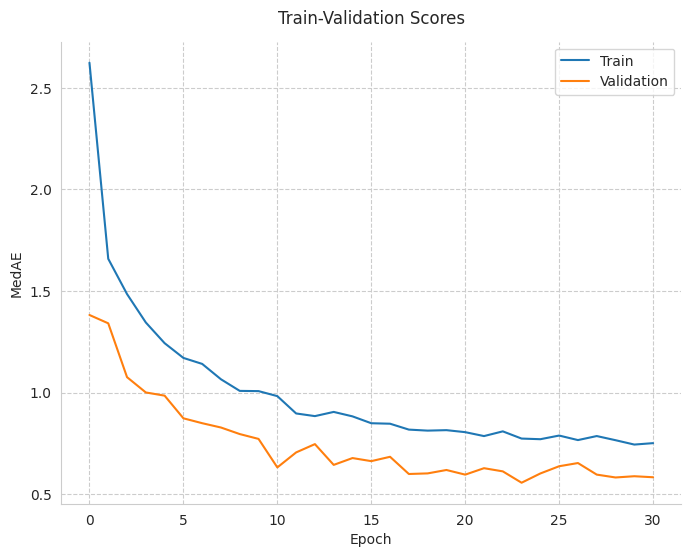

217/217 [==============================] - 1s 1ms/step
Test MedAE: 0.56%

Running CV 2

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 2.9236 - MAE: 3.9918 - val_loss: 1.5743 - val_MAE: 3.0253 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.8179 - MAE: 3.1543 - val_loss: 1.2311 - val_MAE: 2.6284 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.4636 - MAE: 2.5755 - val_loss: 1.0824 - val_MAE: 1.9680 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.3801 - MAE: 2.4200 - val_loss: 1.0584 - val_MAE: 2.1755 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2704 - MAE: 2.2211 - val_loss: 0.9493 - val_MAE: 1.9088 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 3ms/step - loss: 1.1882 - MAE: 1.9636 - val_loss: 0.9667 - val_MAE: 

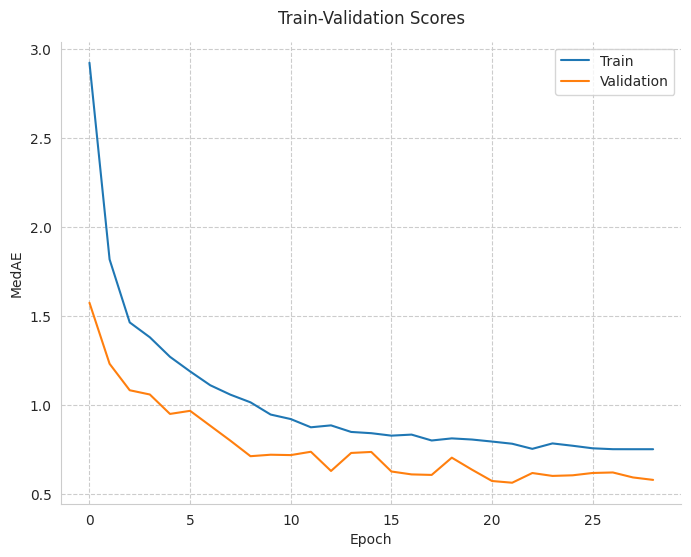

217/217 [==============================] - 1s 1ms/step
Test MedAE: 0.56%

Running CV 3

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 2.5984 - MAE: 3.8613 - val_loss: 1.3320 - val_MAE: 3.1862 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.5594 - MAE: 3.1862 - val_loss: 1.1157 - val_MAE: 2.9599 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.3050 - MAE: 2.8819 - val_loss: 0.9887 - val_MAE: 2.3912 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2718 - MAE: 2.5954 - val_loss: 1.2782 - val_MAE: 2.5503 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.1980 - MAE: 2.2414 - val_loss: 1.1776 - val_MAE: 2.0573 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 3ms/step - loss: 1.0800 - MAE: 2.1573 - val_loss: 0.9502 - val_MAE: 

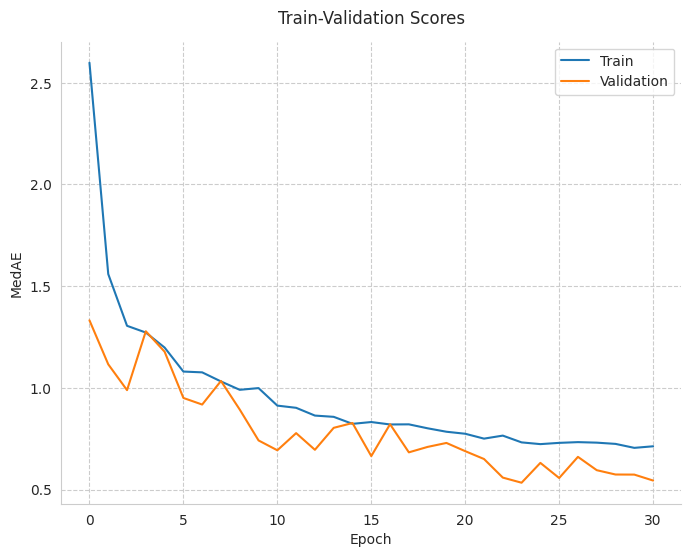

217/217 [==============================] - 1s 1ms/step
Test MedAE: 0.53%

Running CV 4

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 2.9341 - MAE: 3.8857 - val_loss: 1.8277 - val_MAE: 3.1348 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.7315 - MAE: 3.0226 - val_loss: 1.7185 - val_MAE: 2.8791 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.5274 - MAE: 2.6089 - val_loss: 1.0213 - val_MAE: 2.2941 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.4040 - MAE: 2.3434 - val_loss: 1.1413 - val_MAE: 2.1240 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.3222 - MAE: 2.1174 - val_loss: 0.9851 - val_MAE: 1.6728 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 4ms/step - loss: 1.2130 - MAE: 1.7540 - val_loss: 0.9893 - val_MAE: 

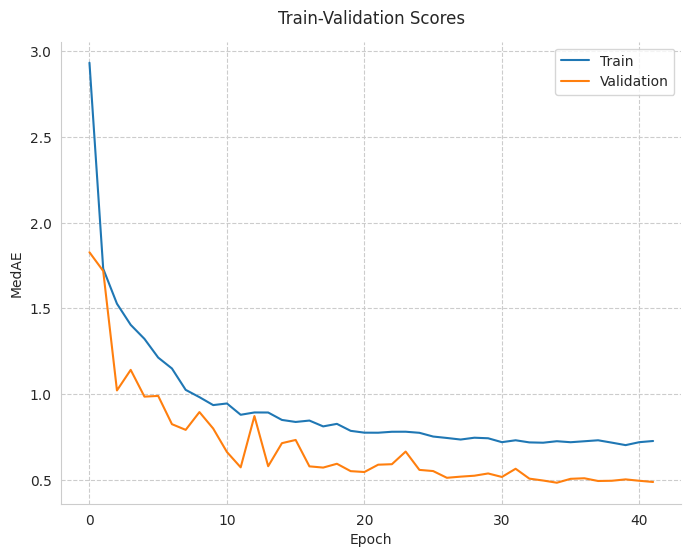

217/217 [==============================] - 1s 2ms/step
Test MedAE: 0.48%

Running CV 5

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 3.0799 - MAE: 3.7671 - val_loss: 2.0615 - val_MAE: 3.0136 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.8388 - MAE: 2.4699 - val_loss: 1.2308 - val_MAE: 1.7429 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.4500 - MAE: 1.8300 - val_loss: 1.0621 - val_MAE: 1.3335 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2503 - MAE: 1.4993 - val_loss: 1.0401 - val_MAE: 1.2391 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.1824 - MAE: 1.4037 - val_loss: 0.9538 - val_MAE: 1.1458 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 3ms/step - loss: 1.1235 - MAE: 1.3298 - val_loss: 1.0228 - val_MAE: 

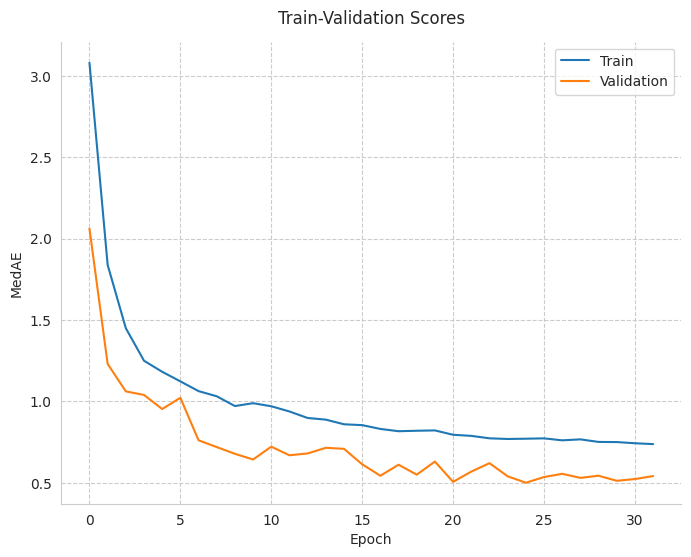

217/217 [==============================] - 1s 1ms/step
Test MedAE: 0.5%

Running CV 6

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 4s 4ms/step - loss: 2.7474 - MAE: 3.6005 - val_loss: 1.1887 - val_MAE: 2.3245 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.6150 - MAE: 2.9168 - val_loss: 0.9183 - val_MAE: 2.2805 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.3553 - MAE: 2.5196 - val_loss: 0.9006 - val_MAE: 1.9150 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2512 - MAE: 2.3055 - val_loss: 0.9747 - val_MAE: 1.9360 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.1509 - MAE: 2.1171 - val_loss: 0.8419 - val_MAE: 1.7258 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 4ms/step - loss: 1.1519 - MAE: 2.0589 - val_loss: 0.7941 - val_MAE: 1

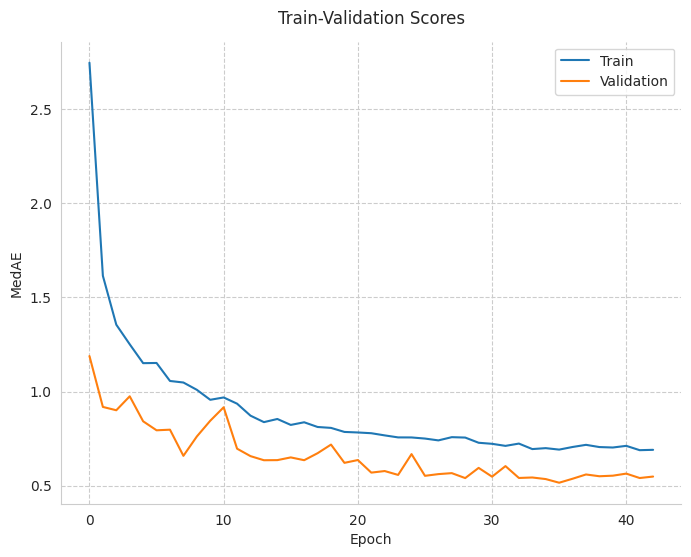

217/217 [==============================] - 1s 1ms/step
Test MedAE: 0.52%

Running CV 7

Adapting Features Space....
Start training the model...
Epoch 1/200
310/310 [==============================] - 3s 4ms/step - loss: 2.7188 - MAE: 3.8223 - val_loss: 1.8494 - val_MAE: 4.2825 - lr: 0.0010
Epoch 2/200
310/310 [==============================] - 1s 3ms/step - loss: 1.6725 - MAE: 3.3411 - val_loss: 1.2524 - val_MAE: 3.1730 - lr: 0.0010
Epoch 3/200
310/310 [==============================] - 1s 3ms/step - loss: 1.4871 - MAE: 2.9418 - val_loss: 1.1111 - val_MAE: 2.6324 - lr: 0.0010
Epoch 4/200
310/310 [==============================] - 1s 3ms/step - loss: 1.3508 - MAE: 2.6588 - val_loss: 1.1525 - val_MAE: 2.8146 - lr: 0.0010
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2936 - MAE: 2.5015 - val_loss: 0.9608 - val_MAE: 2.1764 - lr: 0.0010
Epoch 6/200
310/310 [==============================] - 1s 3ms/step - loss: 1.2102 - MAE: 2.1743 - val_loss: 0.8930 - val_MAE: 

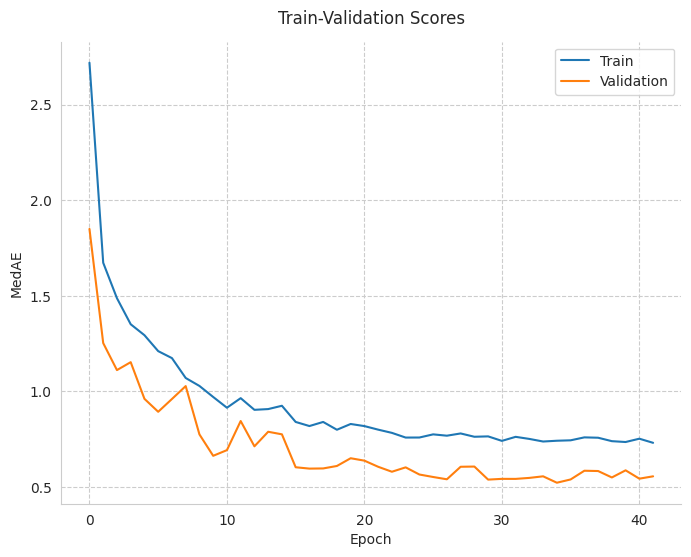

217/217 [==============================] - 1s 1ms/step
Test MedAE: 0.52%


In [40]:
test_results_df = run_experiment(train,test,input_format="concat",experiment_name="model_baseline",splits=8, num_epochs=200, batch_size=32)

In [64]:
test_results_df.clip(lower=1,upper=10,inplace=True)

In [63]:
samp_sub=pd.read_csv("sample_submission.csv",index_col="id")

In [61]:
test_results_df["mean"] = test_results_df.mean(axis=1)

In [66]:
samp_sub["Hardness"] = test_results_df["mean"].values

In [68]:
os.chdir(folder_data)
samp_sub.to_csv("Results/baseline_results_v0.csv")